In [97]:
import os
import chardet as ch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

os.getcwd()

'/content'

In [19]:

df = pd.read_csv('data.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 35995: invalid continuation byte

In [20]:

with open('data.csv','rb') as f:
    re = ch.detect(f.read())
    print(re)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [111]:
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
df.head(500)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
495,Toronto,999888.0,38 ST CLARENS AVE,3,3,Ontario,5647656,43.7417,-79.3733,97000.0
496,Toronto,585000.0,#N810 -120 BAYVIEW AVE,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
497,Toronto,749900.0,#2802 -85 QUEENS WHARF RD,2,1,Ontario,5647656,43.7417,-79.3733,97000.0
498,Toronto,499999.0,#1701 -115 BLUE JAYS WAY,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [22]:
df.tail()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0
35767,Halifax,592900.0,208 2842-2856 Gottingen,2,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [23]:
df[['City']].value_counts()

,count
City,
Regina,1917
Saskatoon,1800
Edmonton,1351
London,1345
New Westminster,1337
Caledon,1336
Burnaby,1334
Vancouver,1328
Victoria,1325


In [24]:
df['Population'].value_counts()


,count
Population,
226404,1917
266141,1800
1151635,1351
423369,1345
78916,1337
76581,1336
249125,1334
2426160,1328
363222,1325


# Data Preprocessing and Cleaning

In [112]:
df =df.select_dtypes(include=['number'])
df

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
0,779900.0,3,2,5647656,43.7417,-79.3733,97000.0
1,799999.0,3,1,5647656,43.7417,-79.3733,97000.0
2,799900.0,2,2,5647656,43.7417,-79.3733,97000.0
3,1200000.0,4,2,5647656,43.7417,-79.3733,97000.0
4,668800.0,1,1,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...
35763,439900.0,2,2,431479,44.8857,63.1005,86753.0
35764,6990000.0,5,5,431479,44.8857,63.1005,86753.0
35765,419900.0,2,2,431479,44.8857,63.1005,86753.0
35766,949900.0,3,1,431479,44.8857,63.1005,86753.0


In [68]:
df.isnull().sum()

,0
Price,0
Number_Beds,0
Number_Baths,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [32]:
df.isna().sum()

,0
Price,0
Number_Beds,0
Number_Baths,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [34]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
35763,True
35764,False
35765,True
35766,False


In [113]:
df.duplicated().sum()

np.int64(8503)

In [114]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [39]:
df.dtypes


,0
Price,float64
Number_Beds,int64
Number_Baths,int64
Population,int64
Latitude,float64
Longitude,float64
Median_Family_Income,float64


# Visualization and EDA
- out target is Price so we want to most correlated features to that Price

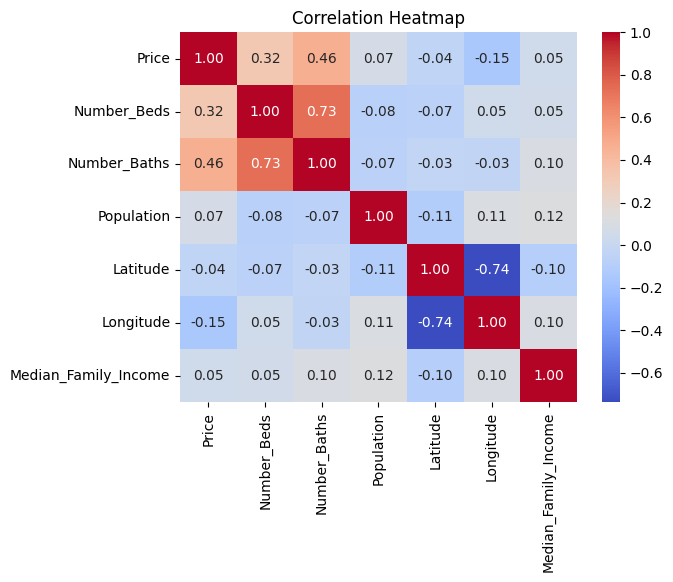

In [115]:
CorrMat= df.corr()
sns.heatmap(CorrMat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

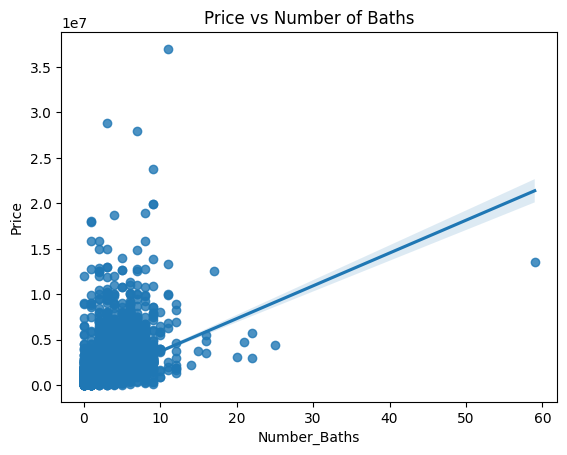

In [72]:
sns.regplot(x='Number_Baths', y='Price', data=df)
plt.title('Price vs Number of Baths')
plt.show()


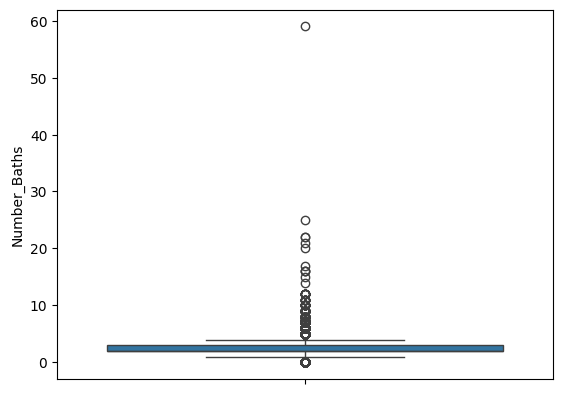

In [73]:
sns.boxplot(df['Number_Baths'])
plt.show()


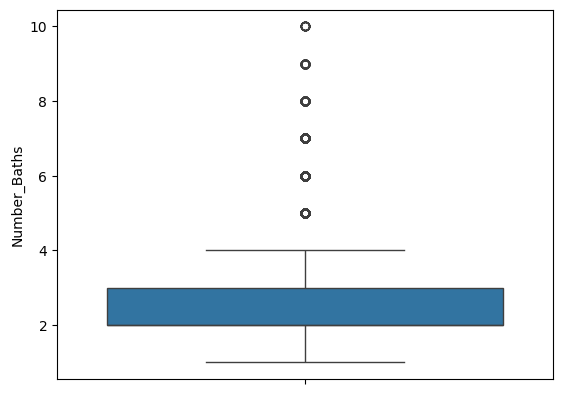

In [116]:
df = df[df['Number_Baths'] <= 10]
df = df[df['Number_Baths'] > 0]
sns.boxplot(df['Number_Baths'])
plt.show()


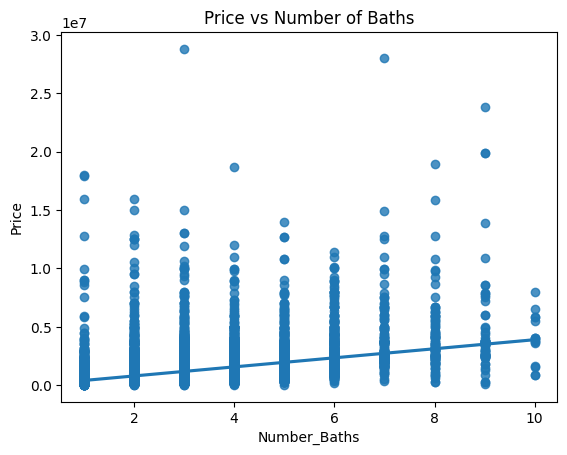

In [117]:
sns.regplot(x='Number_Baths', y='Price', data=df)
plt.title('Price vs Number of Baths')
plt.show()


In [84]:
print(df.nlargest(5, 'Price'))


            Price  Number_Beds  Number_Baths  Population  Latitude  Longitude  \
25546  28800000.0            4             3      109167   49.0250  -122.8028   
26497  27999999.0            5             7      109167   49.0250  -122.8028   
1818   23800000.0            6             9     2426160   49.2500  -123.1000   
1754   19880000.0            7             9     2426160   49.2500  -123.1000   
32097  19880000.0            7             9      249125   49.2667  -122.9667   

       Median_Family_Income  
25546               73000.0  
26497               73000.0  
1818                90000.0  
1754                90000.0  
32097               83000.0  


In [93]:
df[['Price','Number_Baths']].describe()

,Price,Number_Baths
count,2.682200e+04,26822.000000
mean,1.033089e+06,2.658713
std,1.085966e+06,1.319929
min,2.150000e+04,1.000000
25%,4.998885e+05,2.000000
50%,7.499000e+05,2.000000
75%,1.199900e+06,3.000000
max,2.880000e+07,10.000000


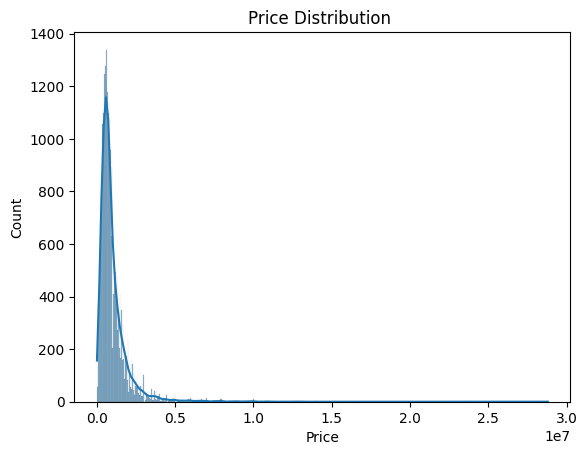

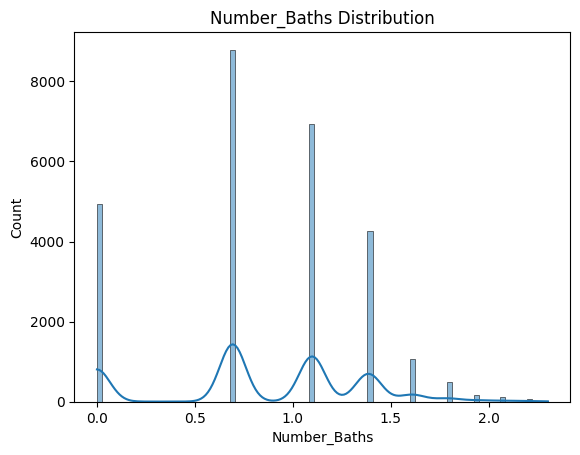

In [98]:
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution ")
plt.show()

sns.histplot(np.log(df['Number_Baths']), kde=True)
plt.title("Number_Baths Distribution")
plt.show()

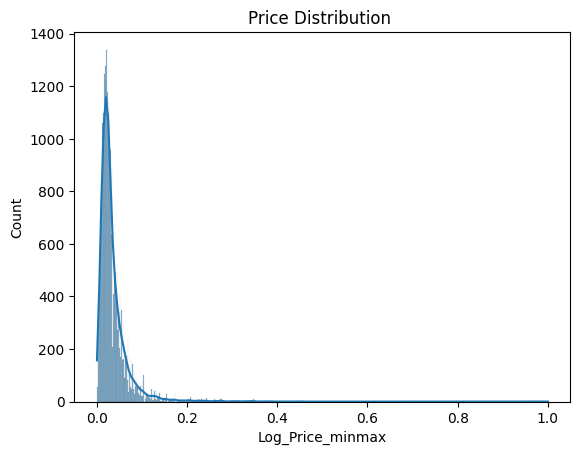

In [101]:
df['Price_minmax'] = MinMaxScaler().fit_transform(df[['Price']])
sns.histplot(df['Price_minmax'], kde=True)
plt.title("Price Distribution ")
plt.show()

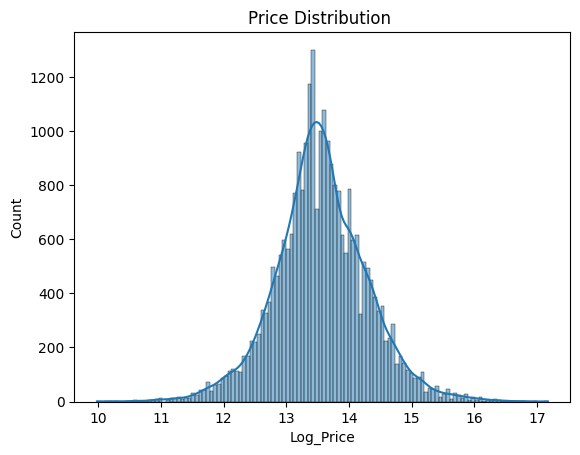

In [119]:
df['Log_Price'] = np.log(df['Price'])
sns.histplot(df['Log_Price'], kde=True)
plt.title("Price Distribution ")
plt.show()

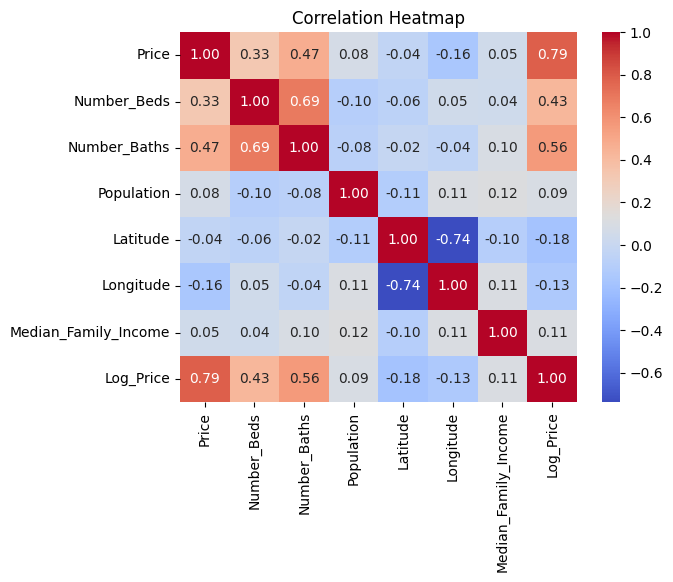

In [120]:
CorrMat= df.corr()
sns.heatmap(CorrMat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [121]:
df[['Log_Price','Number_Baths']].describe()

,Log_Price,Number_Baths
count,26822.000000,26822.000000
mean,13.556873,2.658713
std,0.739386,1.319929
min,9.975808,1.000000
25%,13.122140,2.000000
50%,13.527695,2.000000
75%,13.997749,3.000000
max,17.175886,10.000000


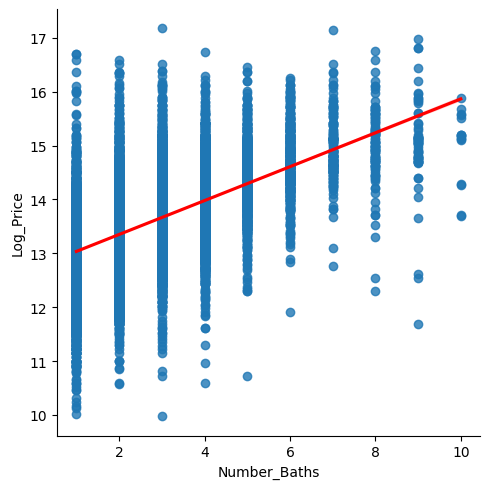

In [122]:
sns.lmplot(data=df, x='Number_Baths', y='Log_Price', line_kws={'color': 'red'})
